In [2]:
import os 
from src import config as cfg
import random
import numpy as np

def get_data(path, window_length, mode):
    # Time sampling is random during training, but is set to a fixed value during test and valid, to ensure repeatability.
    t = 0 if window_length == 990 else random.randint(0, 990 - window_length)
    t = 100 if mode != "train" and window_length != 990 else t
    data = np.load(os.path.join(path, 'sim.npz'), mmap_mode='r')

    mesh_pos = data["pointcloud"][t:t + window_length].copy()

    cells = np.load(os.path.join(path, f"triangles.npy"))
    cells = cells[t:t + window_length]

    Vx = data['VX'][t:t + window_length].copy()
    Vy = data['VY'][t:t + window_length].copy()

    Ps = data['PS'][t:t + window_length].copy()
    Pg = data['PG'][t:t + window_length].copy()

    velocity = np.stack([Vx, Vy], axis=-1)
    pressure = np.stack([Ps, Pg], axis=-1)
    node_type = data['mask'][t:t + window_length].copy()

    return mesh_pos, cells, node_type, t, velocity, pressure

In [3]:
data_path = cfg.DATA_DIR
dataloc = []
mode = 'train'
with open(os.path.join(cfg.SPLITS_DIR, f"{mode}.txt"), "r") as f:
    for line in f.readlines():
        dataloc.append(os.path.normpath(os.path.join(data_path, 'Eagle_dataset', line.strip())))

In [4]:
dataloc[0]

'D:\\EAGLE\\Eagle_dataset\\Spl\\20\\2'

In [5]:
mesh_pos, cells, node_type, t, velocity, pressure = get_data(dataloc[0], 100, mode)

In [6]:
mesh_pos.shape

(100, 3620, 2)

In [7]:
cells.shape

(100, 7078, 3)

In [8]:
node_type.shape

(100, 3620)

In [9]:
t

181

In [10]:
velocity[:, 0]

array([[-1.4081951e+00,  1.8582450e-01],
       [-1.2729321e+00,  3.8592011e-02],
       [-1.1635021e+00, -3.4855407e-02],
       [-1.0902213e+00, -3.7475977e-02],
       [-1.0519358e+00,  1.5669573e-02],
       [-1.0442988e+00,  1.0023860e-01],
       [-1.0634602e+00,  1.8744086e-01],
       [-1.1054043e+00,  2.5838962e-01],
       [-1.1650062e+00,  3.1112358e-01],
       [-1.2362703e+00,  3.6104742e-01],
       [-1.3142136e+00,  4.2726836e-01],
       [-1.3977562e+00,  5.1622897e-01],
       [-1.4842309e+00,  6.0127091e-01],
       [-1.5575619e+00,  6.3467568e-01],
       [-1.5989162e+00,  5.9860295e-01],
       [-1.6077800e+00,  5.1419592e-01],
       [-1.5947133e+00,  4.1198704e-01],
       [-1.5699850e+00,  3.0274045e-01],
       [-1.5287846e+00,  1.6674288e-01],
       [-1.4601431e+00, -1.0010567e-02],
       [-1.3686198e+00, -2.0618157e-01],
       [-1.2744879e+00, -3.7431383e-01],
       [-1.2062413e+00, -4.6655607e-01],
       [-1.1706136e+00, -4.6485648e-01],
       [-1.15057

In [11]:
velocity[:, 1]


array([[-7.76322067e-01,  4.65740728e+00],
       [-8.11917007e-01,  3.94029808e+00],
       [-8.08258712e-01,  3.47677827e+00],
       [-7.78319597e-01,  3.24255300e+00],
       [-7.32480526e-01,  3.20178246e+00],
       [-6.69874191e-01,  3.31320453e+00],
       [-6.02992415e-01,  3.52734685e+00],
       [-5.67393541e-01,  3.77561831e+00],
       [-5.91697216e-01,  3.95187926e+00],
       [-6.62316144e-01,  3.95523453e+00],
       [-7.31326759e-01,  3.78877950e+00],
       [-7.48955905e-01,  3.59458947e+00],
       [-7.14671433e-01,  3.51244187e+00],
       [-6.60439253e-01,  3.58282399e+00],
       [-6.21488273e-01,  3.78036880e+00],
       [-6.41766071e-01,  4.05574465e+00],
       [-7.40855157e-01,  4.33371067e+00],
       [-8.92562926e-01,  4.55400896e+00],
       [-1.05483234e+00,  4.67872477e+00],
       [-1.19974840e+00,  4.63835001e+00],
       [-1.31344533e+00,  4.33221865e+00],
       [-1.35551679e+00,  3.76581264e+00],
       [-1.29434979e+00,  3.15361118e+00],
       [-1.

In [12]:
pressure.shape

(100, 3620, 2)

In [13]:
velocity.shape

(100, 3620, 2)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from src import config as cfg

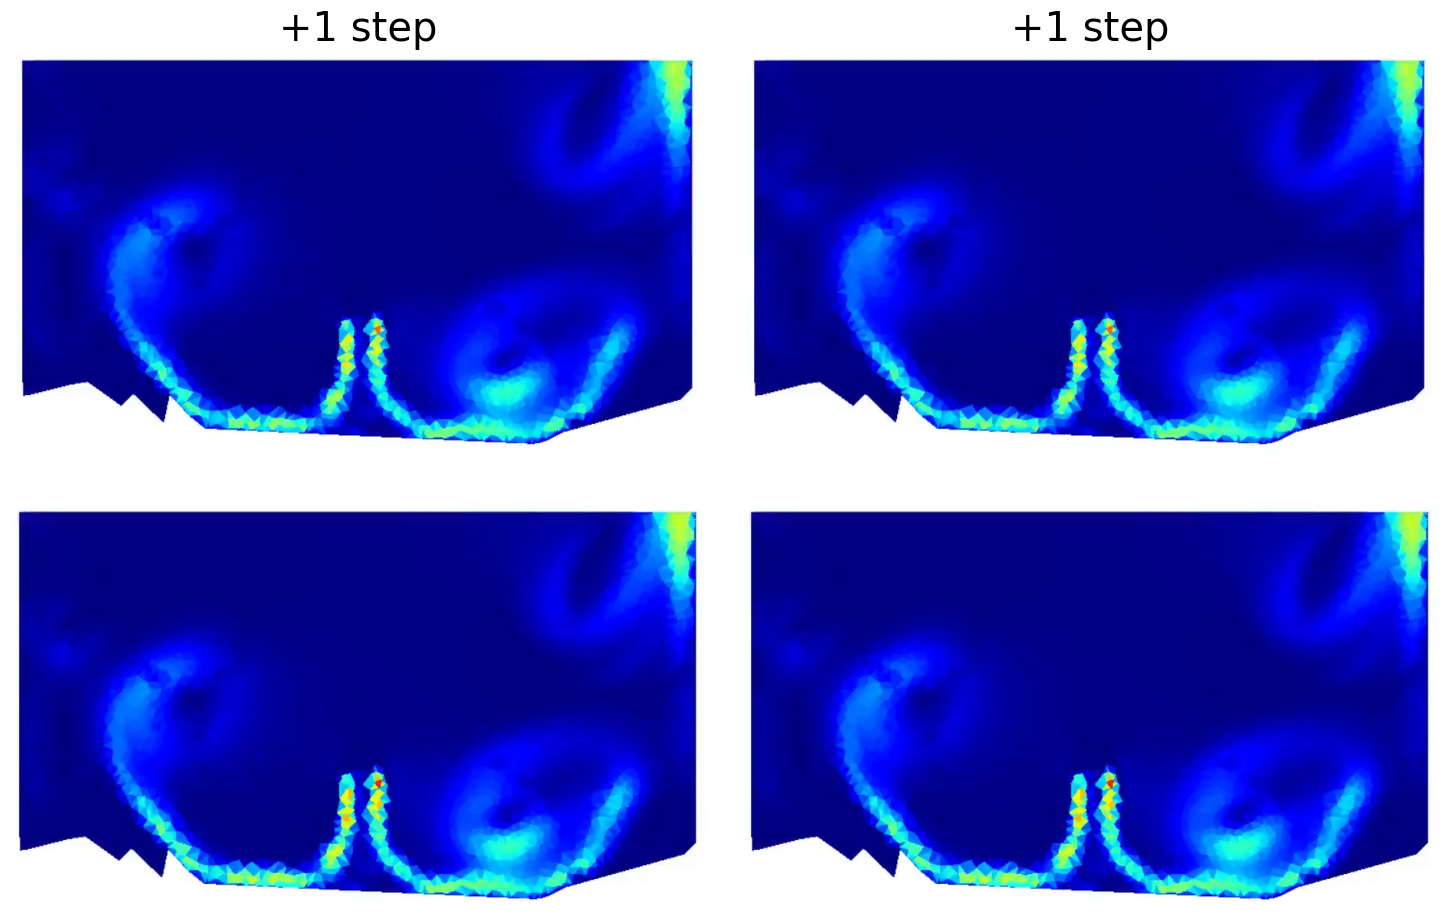

In [57]:
base_path = cfg.PROJECT_DIR
methods = ['GroundTruth', 'PINN-GNN']
file_names = ['true', 'pred']
steps = [1, 1]

images = {}
for file_name, method in zip(file_names, methods):
    images[method] = []
    for step in steps:
        image_path = os.path.join(base_path, f'{file_name}.png')
        images[method].append(Image.open(image_path))
    
fig, axs = plt.subplots(len(methods), 2, figsize=(15, 10))

for i, step in enumerate(steps):
    axs[0, i].set_title(f'+{step} step')

for j, method in enumerate(methods):
    axs[j, 0].set_ylabel(method, rotation=0, labelpad=40, va='center')

# Plot the images
for j, method in enumerate(methods):
    for i, step in enumerate(steps):
        axs[j, i].imshow(images[method][i])
        axs[j, i].axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

fig.savefig('comparison_grid.png', dpi=300)

In [41]:
import pandas as pd
import os


loss_continuity = pd.read_csv(os.path.join(cfg.PROJECT_DIR, 'data', 'loss_continuitycsv.csv'))
loss_momentum_x = pd.read_csv(os.path.join(cfg.PROJECT_DIR, 'data', 'loss_momentum_x.csv'))
loss_momentum_y = pd.read_csv(os.path.join(cfg.PROJECT_DIR, 'data', 'loss_momentum_y.csv'))


In [42]:
loss_momentum_x.head()

,Wall time,Step,Value
0,1.716332e+09,42,7.253798
1,1.716332e+09,45,7.658606
2,1.716332e+09,71,3.934478
3,1.716332e+09,94,4.720113
4,1.716332e+09,167,4.011631


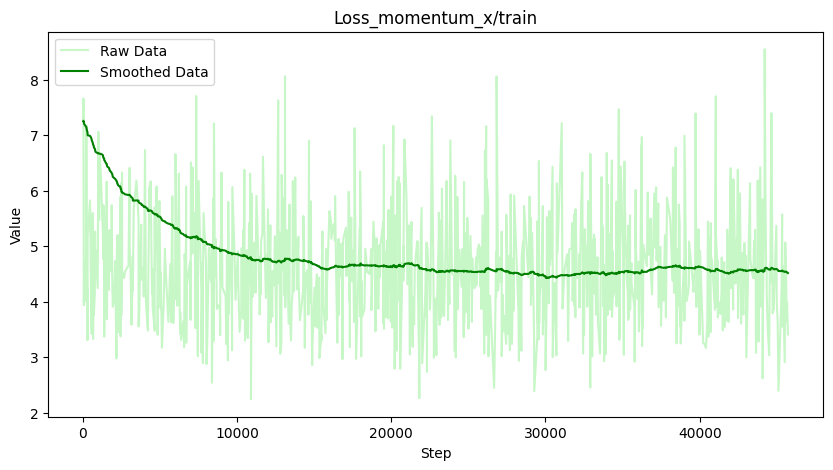

In [44]:
def plot_smoothed_graph(data, smoothing_factor=0.99, name = 'Loss_momentum_x/train'):
    
    # Assuming the CSV has columns 'Step' and 'Value'
    steps = data['Step']
    values = data['Value']

    # Apply exponential smoothing
    smoothed_values = values.copy()
    for i in range(1, len(values)):
        smoothed_values[i] = smoothing_factor * smoothed_values[i-1] + (1 - smoothing_factor) * values[i]

    # Plot the data
    plt.figure(figsize=(10, 5))
    plt.plot(steps, values, color='lightgreen', alpha=0.5, label='Raw Data')
    plt.plot(steps, smoothed_values, color='green', label='Smoothed Data')
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title('Loss_momentum_x/train')
    plt.legend()
    plt.show()

plot_smoothed_graph(loss_momentum_x)

In [48]:
def smoothing(data, smoothing_factor=0.99):
    steps = data['Step']
    values = data['Value']

    smoothed_values = values.copy()
    for i in range(1, len(values)):
        smoothed_values[i] = smoothing_factor * smoothed_values[i-1] + (1 - smoothing_factor) * values[i]
    
    return smoothed_values

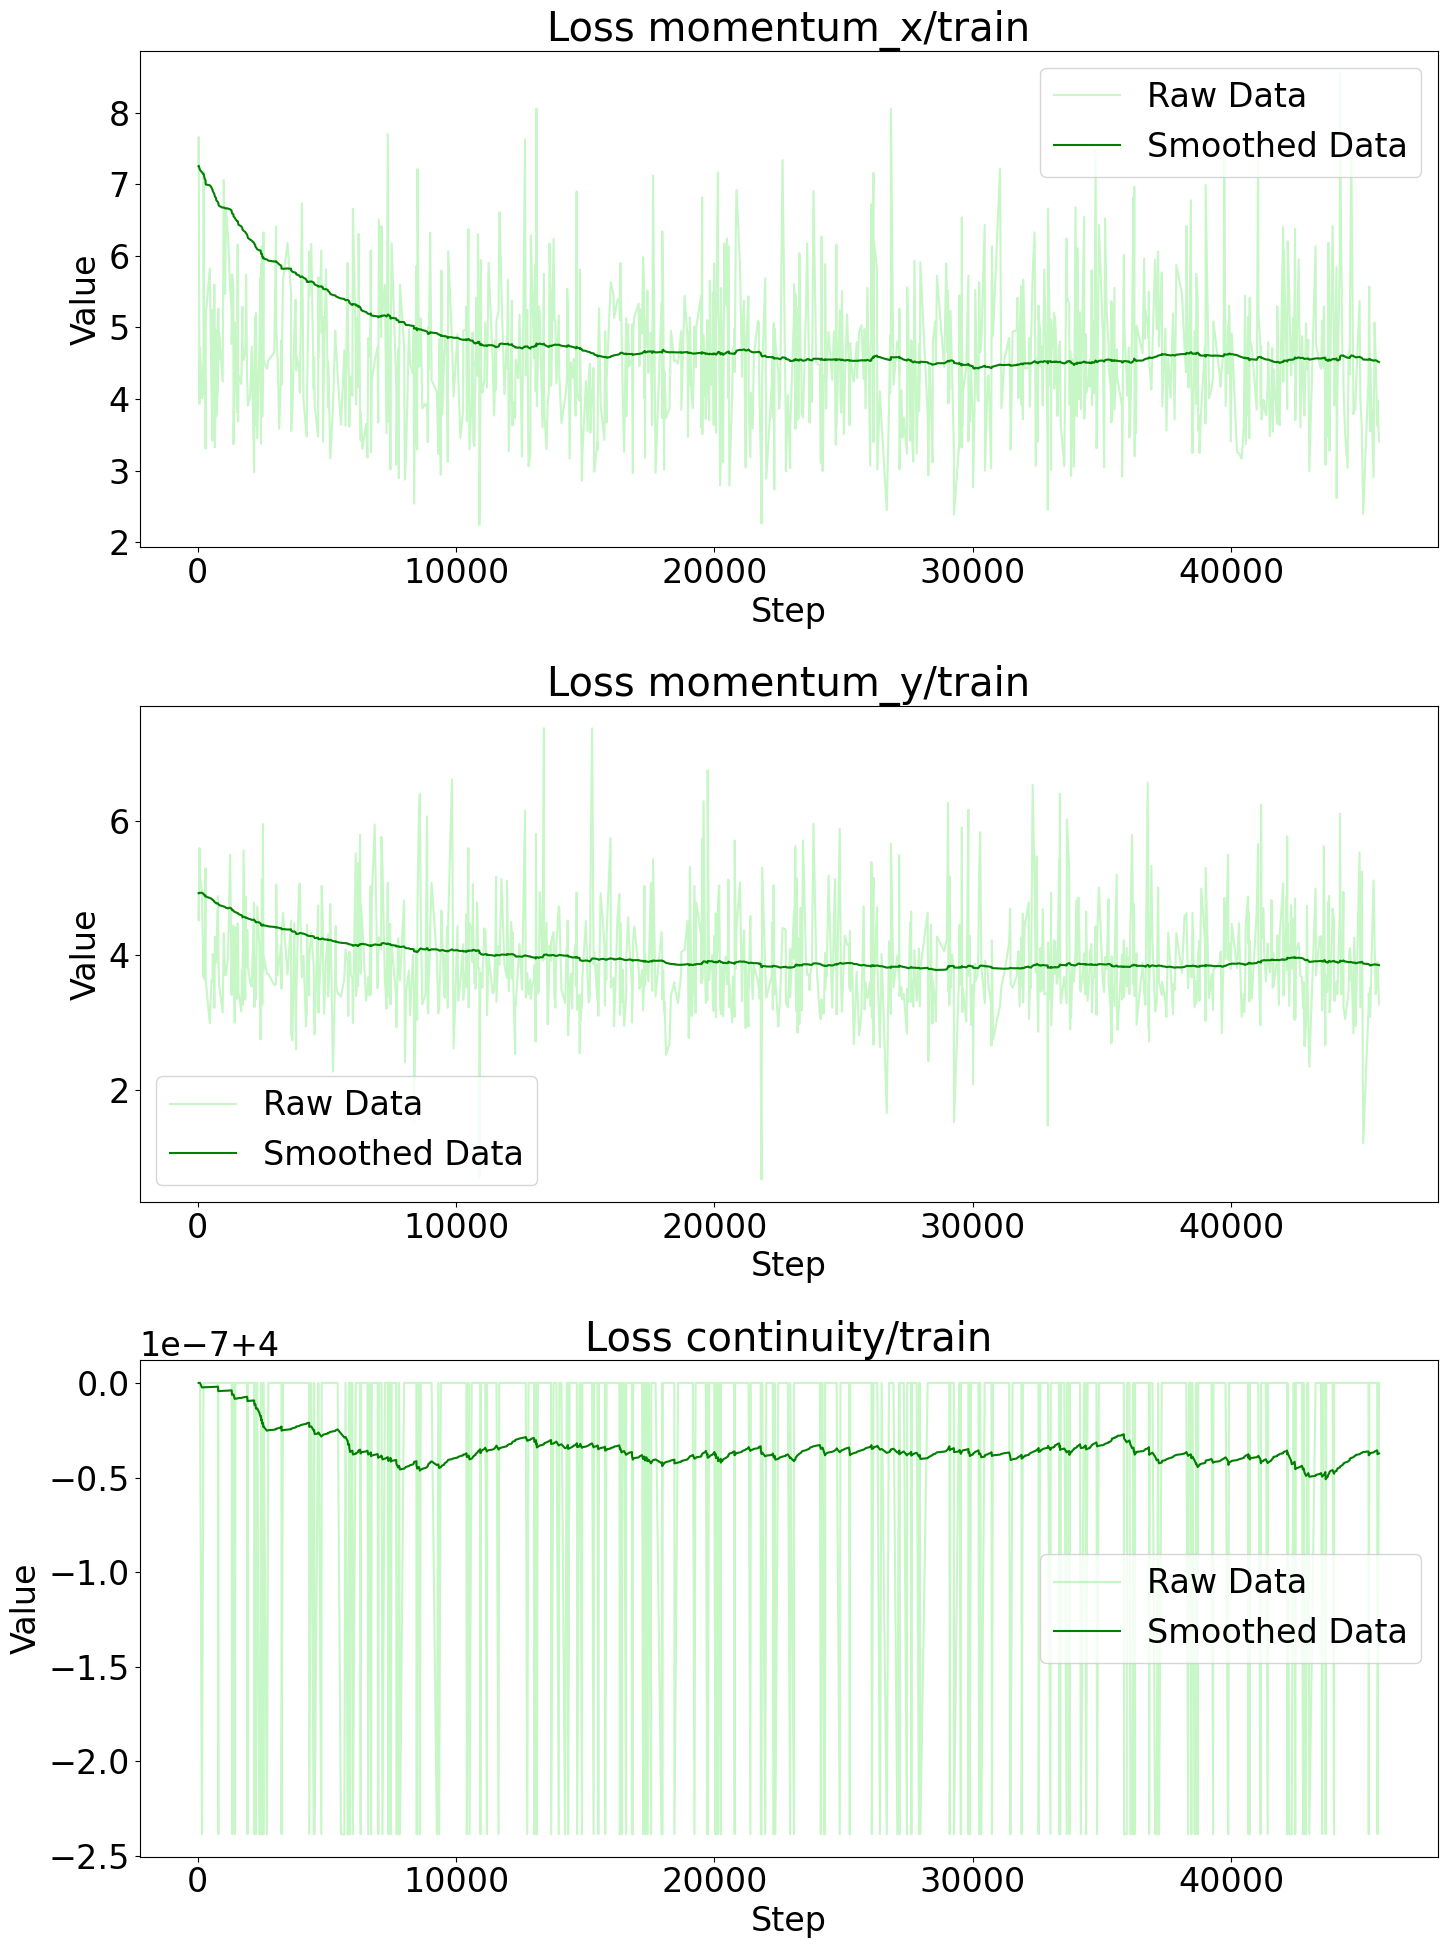

In [56]:
plt.rcParams.update({'font.size': 24})
fig, axs = plt.subplots(3, 1, figsize=(15, 20))
axs.flatten()

axs[0].plot(loss_momentum_x['Step'], loss_momentum_x['Value'], color='lightgreen', alpha=0.5, label='Raw Data')
axs[0].plot(loss_momentum_x['Step'], smoothing(loss_momentum_x), color='green', label='Smoothed Data')
axs[0].set_title('Loss momentum_x/train')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Value')
axs[0].legend()

axs[1].plot(loss_momentum_y['Step'], loss_momentum_y['Value'], color='lightgreen', alpha=0.5, label='Raw Data')
axs[1].plot(loss_momentum_y['Step'], smoothing(loss_momentum_y), color='green', label='Smoothed Data')
axs[1].set_title('Loss momentum_y/train')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Value')
axs[1].legend()

axs[2].plot(loss_continuity['Step'], loss_continuity['Value'], color='lightgreen', alpha=0.5, label='Raw Data')
axs[2].plot(loss_continuity['Step'], smoothing(loss_continuity), color='green', label='Smoothed Data')
axs[2].set_title('Loss continuity/train')
axs[2].set_xlabel('Step')
axs[2].set_ylabel('Value')
axs[2].legend()

plt.tight_layout()
plt.show()

fig.savefig('physics_losses.png', dpi=300)